In [1]:
import sys, os
sys.path.insert(0, '../../../residual2vec_')

In [2]:
os.environ['DISABLE_WANDB'] = 'true'

#disable epoch level tqdm
os.environ['DISABLE_TQDM'] = 'true'

In [3]:
# standard imports
import numpy as np
import pandas as pd
import pickle as pkl
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# codebase
from utils import snakemake_utils, score


/data/sg/ashutiwa/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU: cuda:1


In [5]:

DIR = '../../../final_128'
def get_embs(dataset, directory, root=DIR):
    model_to_embs = {
        "fairwalk+deepwalk": "{}/{}_fairwalk_deepwalk.npy",
        "fairwalk+node2vec": "{}/{}_fairwalk_node2vec.npy",
        "crosswalk+deepwalk": "{}/{}_crosswalk_deepwalk.npy",
        "crosswalk+node2vec": "{}/{}_crosswalk_node2vec.npy",
        "GCN+deepwalk+random": "{}/{}_gcn_None_deepwalk_deepwalk_embs.npy",
        "GCN+deepwalk+r2v": "{}/{}_gcn_None_deepwalk_r2v_embs.npy",
        "GCN+node2vec+random": "{}/{}_gcn_None_node2vec_deepwalk_embs.npy",
        "GCN+node2vec+r2v": "{}/{}_gcn_None_node2vec_r2v_embs.npy",
        "GAT+deepwalk+random": "{}/{}_gat_None_deepwalk_deepwalk_embs.npy",
        "GAT+deepwalk+r2v": "{}/{}_gat_None_deepwalk_r2v_embs.npy",
        "GAT+node2vec+random": "{}/{}_gat_None_node2vec_deepwalk_embs.npy",
        "GAT+node2vec+r2v": "{}/{}_gat_None_node2vec_r2v_embs.npy",
        "deepwalk": "{}/{}_deepwalk_128_embs.npy",
        "node2vec": "{}/{}_node2vec_128_embs.npy",
        "residual2vec": "{}/{}_residual2vec_128_embs.npy"
    }
    folder = root + '/' + dataset + '/' + dataset + '_' + directory
    ret = {}
    for i in model_to_embs:
        ret[i] = np.load(model_to_embs[i].format(folder, dataset))
        
        
    return ret



In [6]:
dataset = "polbook"
embs_airport_1 = get_embs(dataset, 'one')
embs_airport_2 = get_embs(dataset, 'two')
embs_airport_3 = get_embs(dataset, 'three')

embs_airport_4 = get_embs(dataset, 'four')

embs_airport_5 = get_embs(dataset, 'five')


y = snakemake_utils.get_dataset(dataset).get_grouped_col()
N = y.shape[0]





# g = sns.FacetGrid(data=df, col="model", hue="model", row="dataset")
# g.map(sns.displot, x="scores")

Using existing file polbooks.gml


In [7]:
df = []
df.append(pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_1["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_2["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_2["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_3["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_3["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_4["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_4["GAT+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_5["GAT+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_5["GAT+deepwalk+r2v"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['gat'] * 10 * N
    
})
      )
df.append(
    pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_1["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_2["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_2["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_3["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_3["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_4["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_4["GCN+deepwalk+r2v"], y, 'std'),
            score.get_node_parity(embs_airport_5["GCN+deepwalk+random"], y, 'std'),
            score.get_node_parity(embs_airport_5["GCN+deepwalk+r2v"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['gcn'] * 10 * N
    
    
    
})
    )

df.append(
    pd.DataFrame({
    'disparity per node': np.concatenate(
        (
            
            score.get_node_parity(embs_airport_1["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_1["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_2["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_2["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_3["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_3["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_4["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_4["residual2vec"], y, 'std'),
            score.get_node_parity(embs_airport_5["deepwalk"], y, 'std'),
            score.get_node_parity(embs_airport_5["residual2vec"], y, 'std'),
        )
    ),
    'model': np.array(
                      (['baseline'] * N + ['proposed'] * N) * 5 
                      ),
    'run': np.array(
                       ['one'] * 2 * N +
                       ['two'] * 2 * N +
                    ['three'] * 2 * N+
        ['four'] * 2 * N+
        ['five'] * 2 * N
    ),
    'architecture': ['word2vec'] * 10 * N
    
    
    
})
)
df = pd.concat(df, axis=0, ignore_index=True)

df.shape


(3150, 4)

In [8]:
df.head()

,disparity per node,model,run,architecture
0,0.640681,baseline,one,gat
1,0.688232,baseline,one,gat
2,0.510360,baseline,one,gat
3,0.736490,baseline,one,gat
4,0.534353,baseline,one,gat


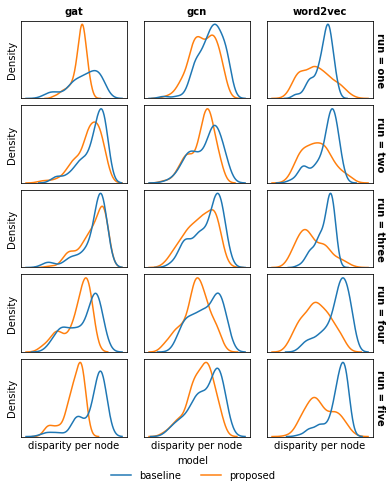

In [26]:
g = sns.displot(data=df, x="disparity per node", kind='kde', hue='model', row="run", 
                col='architecture',
                facet_kws=dict(sharey=False, sharex=False, margin_titles=True, despine=False))
g.fig.set_size_inches(6, 6)
g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=22)
for (i,j,k), data in g.facet_data():
    ax = g.facet_axis(i, j)
    ax.set_yticks([])
    ax.set_xticks([])
#     ax.set_title(str(i) + '_' + str(j))
# sns.move_legend(g, "bottom", bbox_to_anchor=(.55, .45), frameon=False)
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.1), ncol=2)